# Análise do componente principal (Principal Component Analysis - PCA)

PCA, ou Análise de Componentes Principais (Principal Component Analysis), é uma técnica estatística que é comumente usada para redução de dimensionalidade em conjuntos de dados de alta dimensão. O objetivo do PCA é simplificar a complexidade nos dados, preservando as tendências e padrões mais importantes.

A ideia principal por trás do PCA é transformar um conjunto de variáveis correlacionadas em um novo conjunto de variáveis não correlacionadas, chamadas de componentes principais. Esses componentes principais são combinações lineares das variáveis originais e são ordenados por sua variância, de forma que o primeiro componente principal capture a maior variabilidade nos dados, o segundo componente principal capture a segunda maior variabilidade e assim por diante.

A aplicação do PCA envolve os seguintes passos:

Centralização dos dados: Subtrair a média de cada variável para que os dados tenham média zero.
Cálculo da matriz de covariância ou matriz de correlação dos dados.
Decomposição da matriz de covariância ou matriz de correlação em autovetores e autovalores.
Seleção dos componentes principais: Os autovetores correspondentes aos maiores autovalores representam os eixos de máxima variância nos dados. Esses são os componentes principais.
Projeção dos dados nos componentes principais selecionados.
PCA é frequentemente utilizado em problemas onde o número de variáveis é muito grande e existe multicolinearidade entre elas, ou seja, quando há correlação significativa entre as variáveis independentes. Ele é amplamente utilizado em diversas áreas, incluindo análise de dados, reconhecimento de padrões, visão computacional e processamento de sinais, entre outros.

Obs: Multicolinearidade é uma condição em que duas ou mais variáveis independentes em um modelo estatístico estão altamente correlacionadas entre si. Em outras palavras, existe uma relação linear quase perfeita entre pelo menos duas das variáveis independentes no conjunto de dados.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
# Carregando o conjunto de dados de câncer de mama
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Exibindo a descrição do conjunto de dados
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
# Criando um DataFrame com os dados e rótulos
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualização de PCA

É difícil visualizar dados com muitas dimensões. Podemos usar o PCA para encontrar os dois primeiros componentes principais e visualizar os dados neste novo espaço bidimensional, com um único espaço de dispersão. Antes de fazer isso, precisamos escalar nossos dados para que cada parâmetro tenha uma variância unitária.

In [8]:
# Escalando os dados para ter média zero e variância unitária
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)


StandardScaler()

In [9]:
scaled_data = scaler.transform(df)

O PCA com o Scikit Learn usa um processo muito semelhante a outras funções de pré-processamento que acompanham o SciKit Learn. Nós instanciamos um objeto PCA, localizamos os componentes principais usando o método de ajuste e, em seguida, aplicamos a rotação e a redução da dimensionalidade chamando transform().

Também podemos especificar quantos componentes queremos manter ao criar o objeto PCA.

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

Podemos transformar esses dadod em seus dois primeiros componentes principais.

In [12]:
x_pca = pca.transform(scaled_data)
scaled_data.shape

(569, 30)

Reduzimos 30 dimensões para apenas 2! Vamos plotar essas duas dimensões.

Text(0, 0.5, 'Second Principal Component')

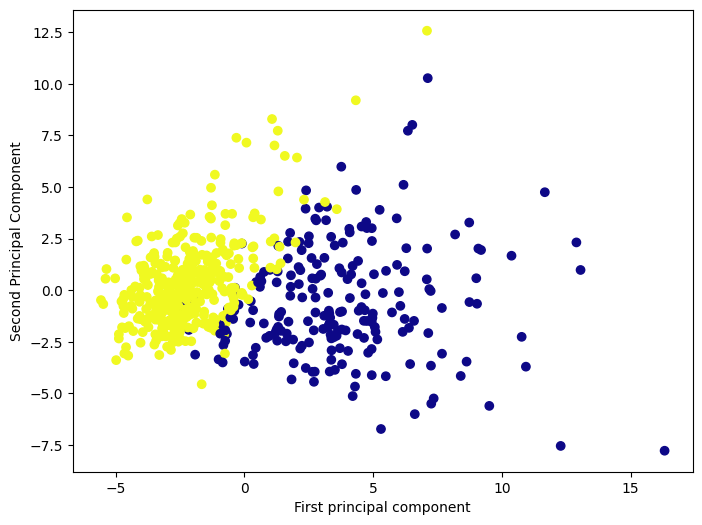

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Claramente, usando esses dois componentes, podemos separar facilmente essas duas classes.

## Interpretando os componentes

Infelizmente, com este grande poder de redução da dimensionalidade, vem o custo de poder entender o que esses componentes representam.

Os componentes correspondem a combinações dos recursos originais. Os próprios componentes são armazenados como um atributo do objeto PCA ajustado:

In [15]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Nessa matriz numérica, cada linha representa um componente principal e cada coluna se relaciona com os recursos originais. podemos visualizar esta relação com um mapa de calor:

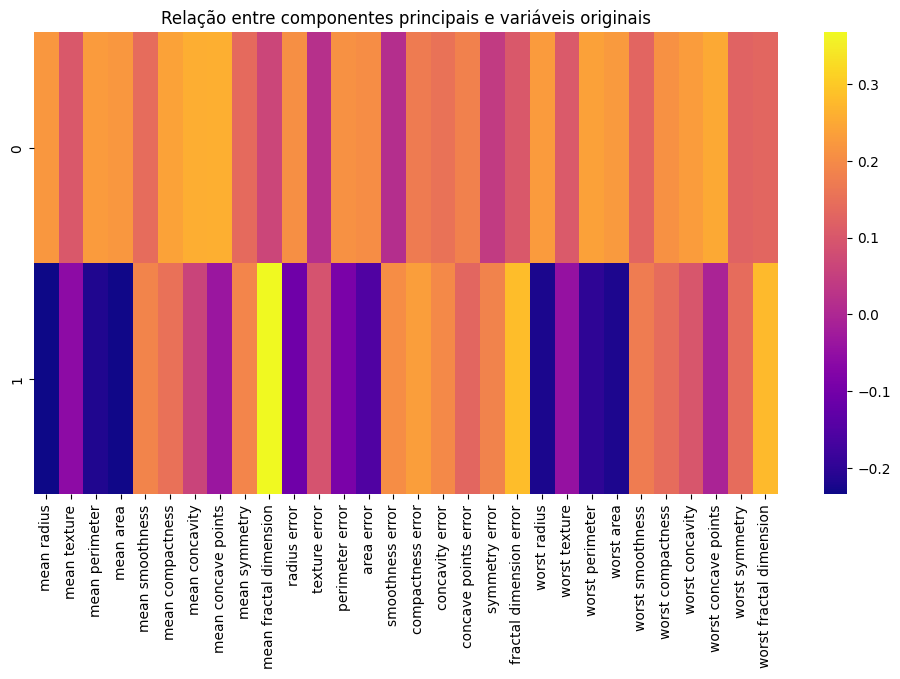

In [18]:
# Extraindo e visualizando os componentes principais
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')
plt.title('Relação entre componentes principais e variáveis originais')
plt.show()